(1) 데이터 가져오기

 sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
 
 diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd


diabetes = load_diabetes()
print(diabetes)
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print(df.head())
# df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# df_y = pd.DataFrame(diabetes.target, columns=['target'])

# df_X = pd.DataFrame(diabetes.data)
# df_y = pd.DataFrame(diabetes.target)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

(2) 모델에 입력할 데이터 X 준비하기

df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [21]:
import numpy as np

X = diabetes.data

(3) 모델에 예측할 데이터 y 준비하기

df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [22]:
y = diabetes.target

(4) train 데이터와 test 데이터로 분리하기

X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


(5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.

In [35]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

(6) 손실함수 loss 정의하기

손실함수를 MSE 함수로 정의해주세요.

In [36]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
#     rmse = mse ** 0.5        # MSE의 제곱근
#     return rmse
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


(7) 기울기를 구하는 gradient 함수 구현하기

기울기를 계산하는 gradient 함수를 구현해주세요.

In [37]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
   
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.36869319 -0.31097871 -4.28800997 -3.22498304 -1.5440604  -1.26655487
  2.88771775 -3.1445484  -4.13647513 -2.79215225]
db: -303.89890037277763


(8) 하이퍼 파라미터인 학습률 설정하기

학습률, learning rate 를 설정해주세요

만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [38]:
LEARNING_RATE = 0.9

(9) 모델 학습하기

정의된 손실함수와 기울기 함수로 모델을 학습해주세요.

loss값이 충분히 떨어질 때까지 학습을 진행해주세요.

입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [39]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -=  LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5705.6149
Iteration 20 : Loss 4962.6894
Iteration 30 : Loss 4597.9875
Iteration 40 : Loss 4319.1782
Iteration 50 : Loss 4101.7260
Iteration 60 : Loss 3929.9426
Iteration 70 : Loss 3792.4076
Iteration 80 : Loss 3680.7656
Iteration 90 : Loss 3588.8829
Iteration 100 : Loss 3512.2376
Iteration 110 : Loss 3447.4798
Iteration 120 : Loss 3392.1127
Iteration 130 : Loss 3344.2622
Iteration 140 : Loss 3302.5103
Iteration 150 : Loss 3265.7739
Iteration 160 : Loss 3233.2169
Iteration 170 : Loss 3204.1867
Iteration 180 : Loss 3178.1672
Iteration 190 : Loss 3154.7451
Iteration 200 : Loss 3133.5850
Iteration 210 : Loss 3114.4109
Iteration 220 : Loss 3096.9930
Iteration 230 : Loss 3081.1374
Iteration 240 : Loss 3066.6785
Iteration 250 : Loss 3053.4739
Iteration 260 : Loss 3041.3995
Iteration 270 : Loss 3030.3465
Iteration 280 : Loss 3020.2188
Iteration 290 : Loss 3010.9313
Iteration 300 : Loss 3002.4077
Iteration 310 : Loss 2994.5798
Iteration 320 : Loss 2987.3863
Iteration 330 : L

Iteration 3900 : Loss 2891.9112
Iteration 3910 : Loss 2891.8936
Iteration 3920 : Loss 2891.8760
Iteration 3930 : Loss 2891.8584
Iteration 3940 : Loss 2891.8408
Iteration 3950 : Loss 2891.8232
Iteration 3960 : Loss 2891.8057
Iteration 3970 : Loss 2891.7881
Iteration 3980 : Loss 2891.7706
Iteration 3990 : Loss 2891.7531
Iteration 4000 : Loss 2891.7356
Iteration 4010 : Loss 2891.7181
Iteration 4020 : Loss 2891.7006
Iteration 4030 : Loss 2891.6832
Iteration 4040 : Loss 2891.6657
Iteration 4050 : Loss 2891.6483
Iteration 4060 : Loss 2891.6309
Iteration 4070 : Loss 2891.6135
Iteration 4080 : Loss 2891.5961
Iteration 4090 : Loss 2891.5787
Iteration 4100 : Loss 2891.5613
Iteration 4110 : Loss 2891.5440
Iteration 4120 : Loss 2891.5266
Iteration 4130 : Loss 2891.5093
Iteration 4140 : Loss 2891.4920
Iteration 4150 : Loss 2891.4747
Iteration 4160 : Loss 2891.4574
Iteration 4170 : Loss 2891.4401
Iteration 4180 : Loss 2891.4229
Iteration 4190 : Loss 2891.4056
Iteration 4200 : Loss 2891.3884
Iteratio

Iteration 7350 : Loss 2886.5617
Iteration 7360 : Loss 2886.5481
Iteration 7370 : Loss 2886.5346
Iteration 7380 : Loss 2886.5210
Iteration 7390 : Loss 2886.5075
Iteration 7400 : Loss 2886.4940
Iteration 7410 : Loss 2886.4805
Iteration 7420 : Loss 2886.4670
Iteration 7430 : Loss 2886.4535
Iteration 7440 : Loss 2886.4400
Iteration 7450 : Loss 2886.4265
Iteration 7460 : Loss 2886.4131
Iteration 7470 : Loss 2886.3996
Iteration 7480 : Loss 2886.3862
Iteration 7490 : Loss 2886.3727
Iteration 7500 : Loss 2886.3593
Iteration 7510 : Loss 2886.3459
Iteration 7520 : Loss 2886.3325
Iteration 7530 : Loss 2886.3191
Iteration 7540 : Loss 2886.3057
Iteration 7550 : Loss 2886.2924
Iteration 7560 : Loss 2886.2790
Iteration 7570 : Loss 2886.2656
Iteration 7580 : Loss 2886.2523
Iteration 7590 : Loss 2886.2390
Iteration 7600 : Loss 2886.2256
Iteration 7610 : Loss 2886.2123
Iteration 7620 : Loss 2886.1990
Iteration 7630 : Loss 2886.1857
Iteration 7640 : Loss 2886.1725
Iteration 7650 : Loss 2886.1592
Iteratio

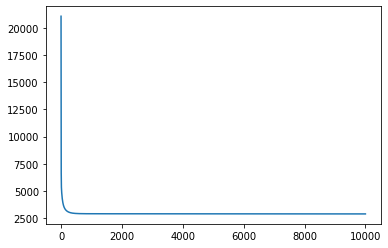

In [40]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [42]:
W, b

(array([  41.23890916, -240.70280301,  553.982307  ,  344.03789852,
        -334.9974511 ,   50.43646729, -104.54366614,  192.41336116,
         507.78615579,   52.93104052]),
 151.31522265203205)

In [41]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2886.571763755155

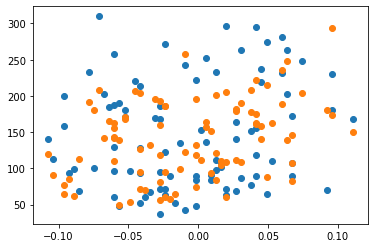

In [33]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()